In [1]:
from textblob import TextBlob
import sys, tweepy
import matplotlib.pyplot as plt
import twitter

# Twitter Sentiment Analysis

En primer lugar, nos meteremos en https://www.sitepoint.com/how-to-create-a-twitter-app-and-api-interface-via-python/ donde nos explica como hacer una cuenta para la API de twitter.

In [2]:
# definimos esta función para una muestra más clara del porcentaje
# de tweets positivos y negativos
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [7]:
# TWITTER
consumerKey = "IwWBdUYBvniB95WAUhOlCxCnD"
consumerSecret = "q7kSFKa8pq77Cw2wfipzA8eFpyMQ1oW43etRlgFei1gD2V6Smr"
accesToken = "973878492931743744-gLLS1EsB5H64R4bCHn8hRYb7v8AH8F4"
accesTokenSecret = "E0vv1HY5rG4kYip1M3TTtq4w4kwEWTBGsECJHnRLDYwTv"
auth = tweepy.OAuthHandler(consumer_key = consumerKey, consumer_secret = consumerSecret)
auth.set_access_token(accesToken, accesTokenSecret)
api = tweepy.API(auth)

# indicadores de búsqueda
searchTerm = input("Enter keyword/hastag to search about:")
noOfSearchTerm = int(input("Enter how many tweets to analyze:"))

# tweets
tweets = tweepy.Cursor(api.search, q = searchTerm, lang="en").items(noOfSearchTerm)


Enter keyword/hastag to search about:Delete Uber
Enter how many tweets to analyze:100


@DesiPoliticks Highest Level of illiteracy of cong https://t.co/k6s93bdURP this case you should delete whatsapp,twi… https://t.co/LvpJJ2BA9L
@Uber_Support I have 2 credit cards on my account and I can’t delete one...Help!
RT @NYETANYC: #Uber admitted paying hackers $100,000 to delete masses of data they stole from the company and keep quiet about it. And then…
RT @TWiT: - Apple increases self-driving car tests while Uber pulls back after the accident.  
- Should you delete your Facebook account?
M…
@Uber_Support I am not able to delete a payment method. There are two credit cards stored and I want to remove one. Please advise.
#Uber admitted paying hackers $100,000 to delete masses of data they stole from the company and keep quiet about it… https://t.co/n3X81J4Ar3
You know you’ve officially passed as a washed up, boring graduate student when you delete the Uber app from your phone.
@Uber_Support How do I update my credit card in the app? It has expired and I can’t delete the card and 

And two mins later, I log out and log back in and issue is magically fixed, all apps accessing data are gone except… https://t.co/uiWApsaFWG
@gskh1237 @facebook @fbnewsroom I don't think you should delete your account. As an ex @facebook user I really like… https://t.co/G1UTHsnXbp
@pixnvids @nytimes Wow, that's just nuts. @facebook demanding a passport in order to simply delete a page.… https://t.co/XXsXCM3D7J
@EnriqueJuarez60 I used to uber eats sharis to my house like multiple times a week then I had to delete the app cau… https://t.co/OF5mS8qNIp
@enjoimorenow @brahmresnik @Uber @dkhos I don't give two shits what they do 

and if you can't have a conversation… https://t.co/ocWF1XiOtd
@WIRED : Posting a video embedded in your tweet that autoplays someone being killed is the most morally reprehensib… https://t.co/qmqAXNLQNW
@Uber_Support 
Hy
I want to delete my Uber acco+923009437340
Email: hafiztariqjaved1@gmail.com
@hillaryjaneee We're sorry to hear about this, Hillary. For your priv

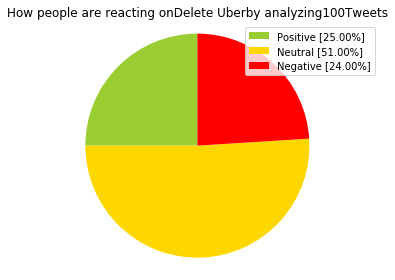

In [8]:
# Sentiment Analysis
positive = 0
negative = 0
neutral = 0
polarity = 0 # average sentiment of all the tweets

for tweet in tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):
        neutral +=1
    elif (analysis.sentiment.polarity > 0.00):
        positive +=1
    elif (analysis.sentiment.polarity < 0.00):
        negative +=1

# porcentajes
positive = percentage(positive, noOfSearchTerm)
negative = percentage(negative, noOfSearchTerm)
neutral = percentage(neutral, noOfSearchTerm)

positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

print("How people are reacting on ",searchTerm, "by analyzing", str(noOfSearchTerm), "Tweets")

if (polarity == 0):
    print("Neutral")
elif (polarity < 0):
    print("Negative")
elif (polarity > 0):
    print("Positive")
    
    
labels = ['Positive ['+str(positive)+'%]','Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen','gold','red']

patches, text = plt.pie(sizes, colors = colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title("How people are reacting on" + searchTerm + "by analyzing" + str(noOfSearchTerm) + "Tweets")
plt.axis('equal')
plt.tight_layout()
plt.show()
